# Clustering Using K-Means Algorithm

# Challenge Session

##  K-Means Clustering

##Task 1

### Importing required Python Libraries

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
#reading data file 
df=pd.read_csv('/content/DS2_C6_S2_CarSales_Data_Challenge.csv')


In [ ]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

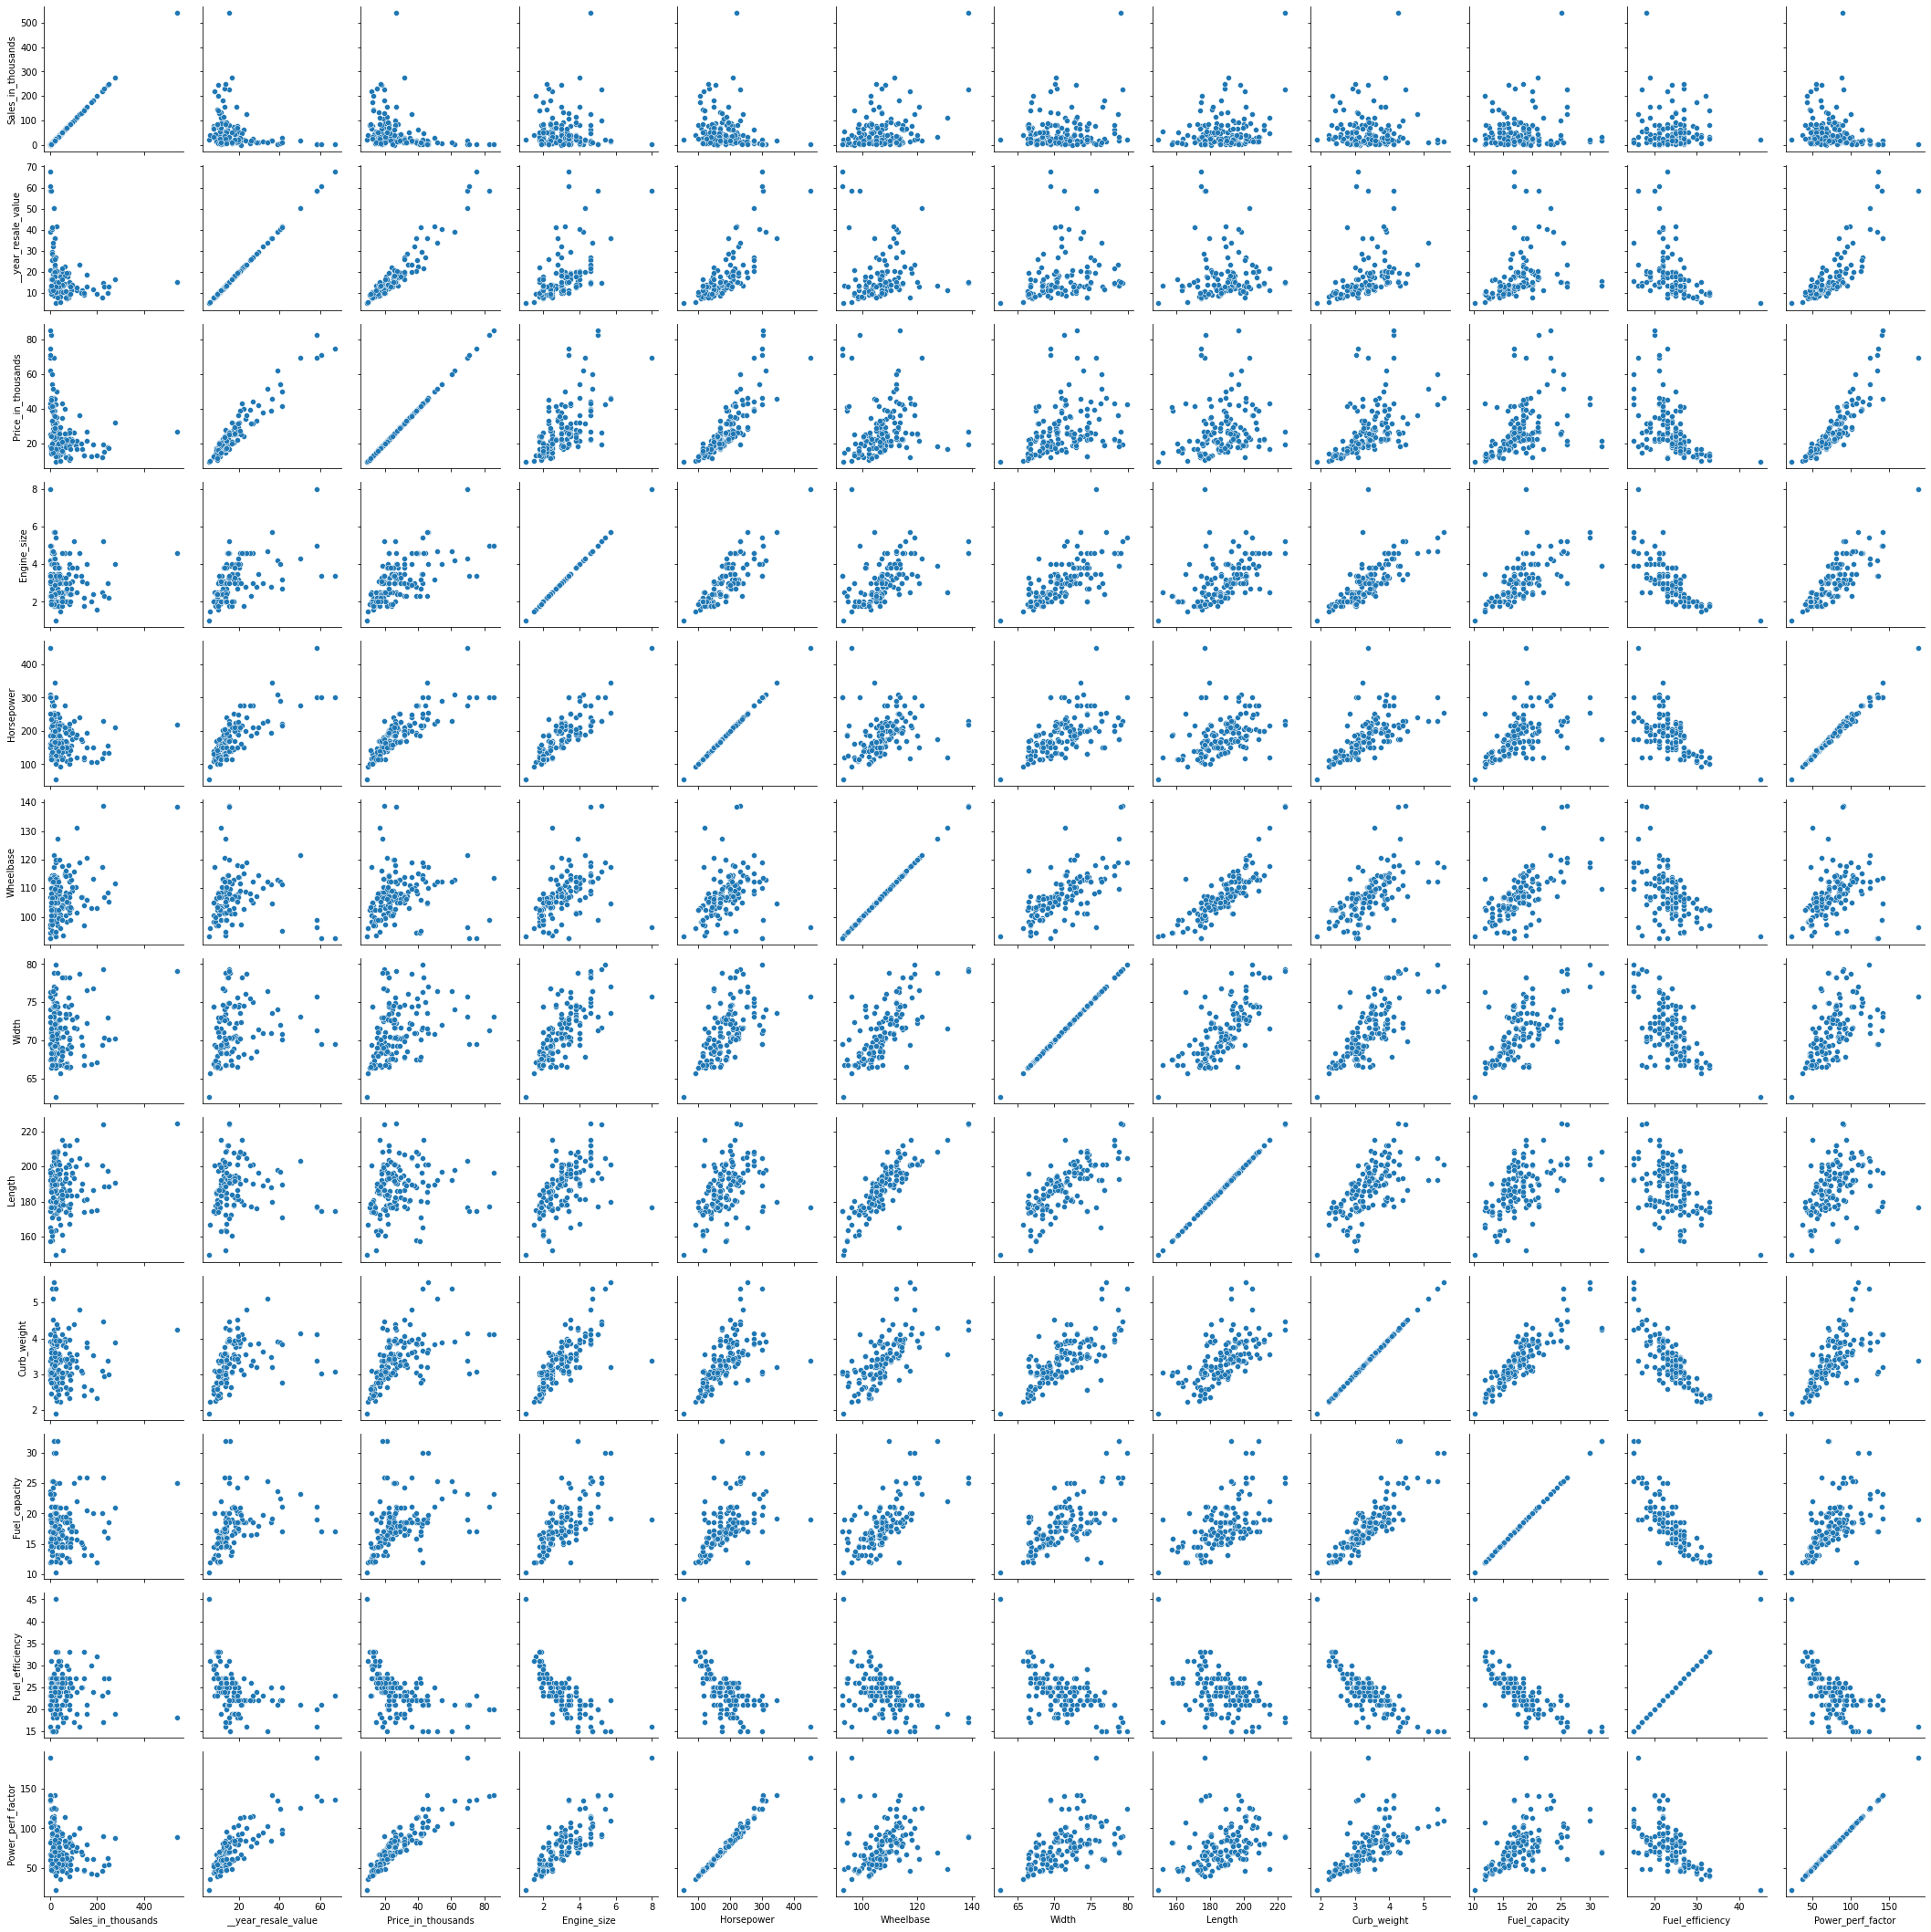

In [ ]:
# scatter plot to understand the spread of data with each other
# It gives a understanding about the correlation of data
import seaborn as sns
g = sns.PairGrid(df)
g.map(sns.scatterplot);

In [ ]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [ ]:
(df.isna().sum()) # checking null values

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [ ]:
df=df.drop('__year_resale_value',axis=1) # removing the field

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
data_df=df
data_df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
#converting non int type to category
data_df['Manufacturer']=data_df['Manufacturer'].astype('category')
data_df['Model']=data_df['Model'].astype('category')
data_df['Vehicle_type']=data_df['Vehicle_type'].astype('category')
data_df['Latest_Launch']=data_df['Latest_Launch'].astype('category')


In [ ]:
# Label encoding
# categorical to numerical as the model works on numerical values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['Manufacturer_encode']= label_encoder.fit_transform(data_df['Manufacturer'])
data_df['Manufacturer_encode'].unique()

data_df['Model_encode']= label_encoder.fit_transform(data_df['Model'])
data_df['Model_encode'].unique()

data_df['Vehicle_type_encode']= label_encoder.fit_transform(data_df['Vehicle_type'])
data_df['Vehicle_type_encode'].unique()

data_df['Latest_Launch']= label_encoder.fit_transform(data_df['Latest_Launch'])
data_df['Latest_Launch'].unique()



array([ 47,  93,   9,  52,  20, 119,  50,  91,   7,  73,  25, 129,  57,
       101,  48,  72,  29, 128,  67, 109,  55,  79,  38,  15,  75, 122,
        65,  87,   3,  24,  95,  19,  82,  99,  43,  34,  96,  17,  88,
       118,  61,  10, 103,  27,  90, 120,  59,   8, 111,  36, 100, 127,
        70,  49, 123,   0, 108,  14,  78,  56,  21,  51, 121,  23,  85,
        66,  31,  60,  18,  33, 106,  74,  30,  58,  16, 114,  94,  39,
        68,  26, 113,  92,   4,  77,  35, 125, 102,  44,  12,  69,  98,
        84,  54,   2, 117, 105,  64,  42, 115, 110,  81,  62, 126,   5,
       112,  80,  63,  45, 124,  89,  71,  22,   6,  28,  86,  11,  76,
        46,  37,  97,  32,  83,  53,   1, 116,  41, 104,  40, 107,  13])

In [ ]:
data_df.dtypes

Manufacturer           category
Model                  category
Sales_in_thousands      float64
Vehicle_type           category
Price_in_thousands      float64
Engine_size             float64
Horsepower              float64
Wheelbase               float64
Width                   float64
Length                  float64
Curb_weight             float64
Fuel_capacity           float64
Fuel_efficiency         float64
Latest_Launch             int64
Power_perf_factor       float64
Manufacturer_encode       int64
Model_encode              int64
Vehicle_type_encode       int64
dtype: object

In [ ]:

#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled.columns

Index(['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor',
       'Manufacturer_encode', 'Model_encode', 'Vehicle_type_encode'],
      dtype='object')

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = df_filled.select_dtypes(include=numerics)
 #new_data_df1 = new_data_df.drop(['lat', 'lng'], axis=1)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Manufacturer_encode,Model_encode,Vehicle_type_encode
0,-0.532042,-0.415046,-1.214376,-0.814043,-0.828562,-1.123975,-1.122039,-1.185695,-1.227193,0.984337,-0.459471,-0.754924,-1.694221,0.029623,0.594515
1,-0.200761,0.070066,0.134385,0.694470,0.080215,-0.249496,0.412744,0.216162,-0.192199,0.275434,0.755578,0.572142,-1.694221,1.453800,0.594515
2,-0.573406,0.387625,0.134385,0.694470,-0.077833,-0.162048,0.345363,0.141119,-0.192199,0.511735,-1.463207,0.609647,-1.694221,-1.172026,0.594515
3,-0.654896,1.026229,0.423406,0.428262,0.936309,0.071147,0.689753,0.747845,0.014800,-0.433470,-0.327400,0.572904,-1.694221,0.830723,0.594515
4,-0.480754,-0.239984,-1.214376,-0.636571,-0.644172,-0.861631,-0.702781,-0.612498,-0.399198,0.748036,-1.172652,-0.574556,-1.577506,-1.550323,0.594515
5,-0.504599,0.460265,-0.250975,0.250790,0.159239,1.441164,0.345363,0.286414,0.144174,-0.433470,1.442345,0.299208,-1.577506,-1.528071,0.594515
6,-0.761189,2.432352,1.097787,2.202984,0.725579,0.829029,0.809541,0.830871,1.489666,-0.669771,-0.380228,2.308086,-1.577506,-1.505818,0.594515
7,-0.490339,-0.029066,-0.539996,-0.281627,-0.025150,-0.803333,-0.852516,-0.323505,-0.347448,0.511735,0.702750,-0.237139,-1.460792,-1.661587,0.594515
8,-0.645414,0.421597,-0.250975,0.126559,-0.025150,-0.774183,-0.852516,-0.294766,-0.347448,0.039133,-1.516035,0.191407,-1.460792,-1.639335,0.594515
9,-0.523076,0.808280,-0.250975,0.126559,0.514848,-0.074600,0.045893,0.144313,0.144174,0.275434,0.227296,0.276493,-1.460792,-1.572576,0.594515


In [ ]:
(data_df1.isna().sum()) # re-checking null values after imputation based data filling

Sales_in_thousands     0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Manufacturer_encode    0
Model_encode           0
Vehicle_type_encode    0
dtype: int64

In [ ]:
#np.where(np.isnan(data_df2)) 
#np.isnan(data_df).sum()

### TAsk 2

In [ ]:
# findng optimal value of K

Method 1: ELBOW METHOD

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_df1)
    # calculates squared error
    # for the clustered points
    Sum_of_squared_distances.append(km.inertia_)

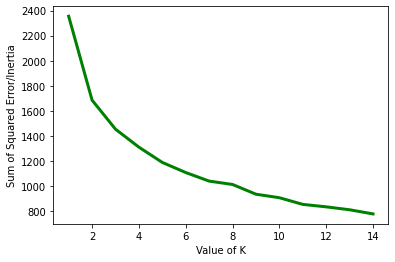

In [ ]:
     
# plot the cost against K values
plt.plot(K, Sum_of_squared_distances, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error/Inertia")
plt.show() 
 

### From the graph, its clear that, the elbow is at k=2 (i.e. Sum of squared distances falls suddenly) , optimal k for this dataset is 2

##Method 2:  using Silhoutte score

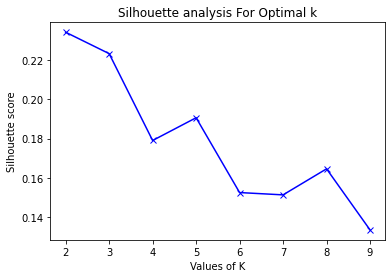

In [ ]:
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
range_n_clusters =range(2,10) 
#Silhouette Coefficient is only defined 
#if number of labels is 2 <= n_labels <= n_samples - 1. 
#So, start the range from 2 to n
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_df1)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data_df1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Higher Silhoutte score is good for fixing the K value

### TAsk3

We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters.

### Modelling with K=2

In [ ]:
Kmeans_model_2 = KMeans(n_clusters=2)
Kmeans_model_2.fit(data_df1)

KMeans(n_clusters=2)

In [ ]:
cluster_centroid_2 = Kmeans_model_2.cluster_centers_
cluster_centroid_2

array([[-0.03754656,  0.46669949,  0.65348853,  0.62460872,  0.51388704,
         0.60982586,  0.53205605,  0.6730584 ,  0.58806458, -0.56135017,
         0.11324911,  0.60883044, -0.24970552,  0.0500433 , -0.31610806],
       [ 0.04432581, -0.55096467, -0.77147951, -0.7373853 , -0.6066722 ,
        -0.71993331, -0.62812173, -0.79458284, -0.69424291,  0.66270507,
        -0.13369686, -0.71875815,  0.29479124, -0.05907889,  0.37318313]])

In [ ]:
labels_2= Kmeans_model_2.labels_
labels_2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int32)

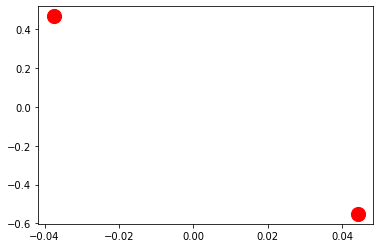

In [ ]:
#plt.scatter(df[:,lat],df[:,lng])
plt.scatter(Kmeans_model_2.cluster_centers_[:,0],Kmeans_model_2.cluster_centers_[:,1],s=200,c='red')

In [ ]:
#Adding predicted cluster labels to data
labels = pd.DataFrame(Kmeans_model_2.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledClusters = pd.concat((data_df1,labels),axis=1)
labeledClusters = labeledClusters.rename({0:'labels'},axis=1)

In [ ]:
labeledClusters

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Manufacturer_encode,Model_encode,Vehicle_type_encode,labels
0,-0.532042,-0.415046,-1.214376,-0.814043,-0.828562,-1.123975,-1.122039,-1.185695,-1.227193,0.984337,-0.459471,-0.754924,-1.694221,0.029623,0.594515,1
1,-0.200761,0.070066,0.134385,0.694470,0.080215,-0.249496,0.412744,0.216162,-0.192199,0.275434,0.755578,0.572142,-1.694221,1.453800,0.594515,0
2,-0.573406,0.387625,0.134385,0.694470,-0.077833,-0.162048,0.345363,0.141119,-0.192199,0.511735,-1.463207,0.609647,-1.694221,-1.172026,0.594515,0
3,-0.654896,1.026229,0.423406,0.428262,0.936309,0.071147,0.689753,0.747845,0.014800,-0.433470,-0.327400,0.572904,-1.694221,0.830723,0.594515,0
4,-0.480754,-0.239984,-1.214376,-0.636571,-0.644172,-0.861631,-0.702781,-0.612498,-0.399198,0.748036,-1.172652,-0.574556,-1.577506,-1.550323,0.594515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-0.729263,-0.211159,-1.118036,-0.459099,-0.920756,-1.036527,-0.807596,-0.542246,-0.554447,0.275434,1.574415,-0.425323,1.690504,1.565064,0.594515,1
153,-0.556728,0.006790,-0.636336,-0.317121,-0.341246,-0.540989,-0.111328,-0.277202,-0.011075,0.275434,-1.014167,-0.258663,1.690504,1.053250,0.594515,1
154,-0.523017,0.098188,-0.636336,-0.317121,-0.341246,-0.540989,-0.088868,-0.195773,-0.011075,0.275434,0.649922,-0.238552,1.690504,1.587317,0.594515,1
155,-0.730030,1.272301,-0.732676,0.889690,-0.341246,0.100296,-0.126302,0.350280,0.144174,-0.197168,0.174468,0.983311,1.690504,-1.194279,0.594515,0


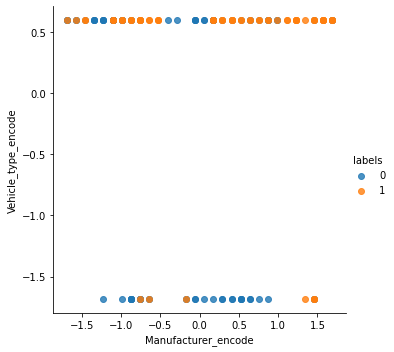

In [ ]:
#sns.lmplot(x=data_df1['Manufacturer_encode'],y=data_df1['Vehicle_type_encode'],data=labeledClusters,hue='labels',fit_reg=False)

sns.lmplot(x='Manufacturer_encode',y='Vehicle_type_encode',data=labeledClusters,hue='labels',fit_reg=False)

In the above plot, 2 variables are plotted - Manufacturer, Vehicle_type  are plotted.There is no clear distinction between the 2 classes.

###Since, we cannot comment much on the above graph, the PCA on the entire data frame is done and better inferences can be drawn fron the graph 

In [ ]:
# principal component analysis for dimentionality reduction.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca=PCA(0.95)#95% variance is maintained
pca.fit(data_df1)
X_reduced = pca.transform(data_df1)
print(pca.n_components_)
print(pca.explained_variance_ratio_) #tells how much info is given by each principal component


print("Original dataset shape:", data_df1.shape)
print("Reduced dataset shape:", X_reduced.shape)

2
[0.4433307  0.15936869]
Original dataset shape: (157, 15)
Reduced dataset shape: (157, 2)


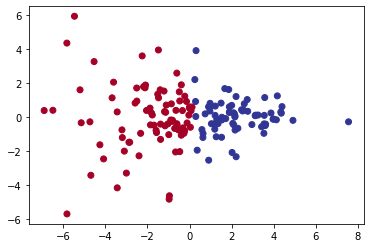

In [ ]:
y=Kmeans_model_2.labels_
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,cmap='RdYlBu')

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=80, cmap='RdYlBu')

centers = Kmeans_model_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);